WINE DATASET:

In [1]:
#IMPORT ALL IMPORTANT LIBRARIES

%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

In [2]:
#LOAD DATASET:

wine_url = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

wine= pd.read_csv(wine_url, quotechar='"', skipinitialspace=True, 
                               names = ['0', '1', '2','3','4','5','6',
                                        '7', '8', '9', '10','11', '12', ])
wine = wine.dropna()

# Convert labels from strings to boolean
label_encoder = preprocessing.LabelEncoder()
wine_labels = pd.DataFrame(label_encoder.fit_transform(wine.iloc[:,1]))
# Convert nominal attributes to encoded versions
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
wine_url = pd.DataFrame(attr_encoder.fit_transform(wine.iloc[:,2:13].T.to_dict().values()))
wine_url.columns = attr_encoder.get_feature_names()
#print wine_labels



C:\Users\sinjo\Anaconda2\lib\site-packages\pandas\core\frame.py:835: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


                0           1           2           3           4           5  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

                6           7           8           9          10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685   
std      0.998859    0.1244

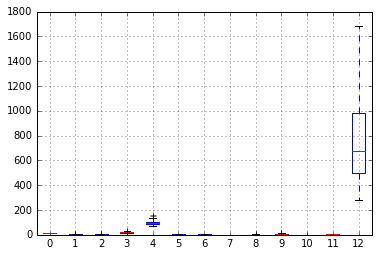

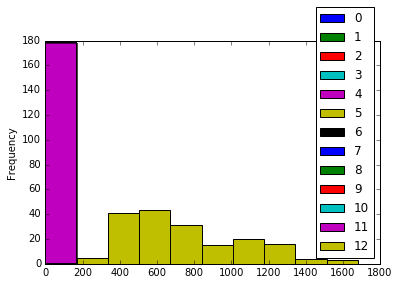

In [3]:
#DESCRIPTIVE STATISTICS AND DATA VISUALIZATION
print wine.describe()
wine.boxplot(return_type='axes')
plt.figure()
wine.plot(kind='hist')

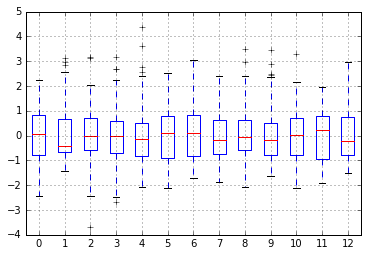

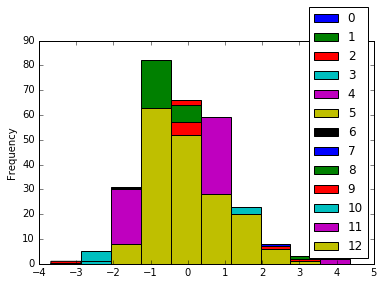

In [4]:
#DATA TRANSFORMATION
scaler= preprocessing.StandardScaler()
wine_scaled_values=scaler.fit_transform(wine.values)
wine_values=pd.DataFrame(wine_scaled_values,columns=wine.columns)
wine_values.boxplot(return_type='axes')
plt.figure()
wine_values.plot(kind='hist')

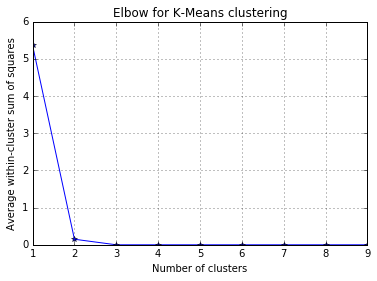

In [5]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(wine_url,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(wine_url, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/wine.shape[0] for d in dist] 
#print avgWithinSS
kIdx = 0
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  

In [6]:
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

In [7]:
foldnum=0
for train, test in cross_validation.KFold(len(wine_labels), shuffle=True, n_folds=4,
                                           random_state=20160217):
    foldnum+=1
    [wine_tr_data, wine_te_data, 
     wine_tr_targets, wine_te_targets] = folds_to_split(wine, wine_labels, train, test)

In [8]:
#KMEANS:

kmeans1=cluster.KMeans(n_clusters=3, init='random', n_init=10)
wine_means1=kmeans1.fit_transform(wine_te_targets)

kmeans2=cluster.KMeans(n_clusters=3, init='k-means++', n_init=10)
wine_means=kmeans2.fit_transform(wine_te_targets)

mK1=cluster.MiniBatchKMeans(n_clusters=3, init='random', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
wine_mk=mK1.fit_transform(wine_te_targets)

mK2=cluster.MiniBatchKMeans(n_clusters=8, init='k-means++', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
wine_mk2=mK2.fit_transform(wine_te_targets)




In [9]:

kmeans1.fit(wine_tr_data, wine_tr_targets)
kmeans2.fit(wine_tr_data, wine_tr_targets)
mK1.fit(wine_tr_data, wine_tr_targets)
mK2.fit(wine_tr_data, wine_tr_targets)

# Print out the coefficient of determination (R^2)
print "R^2:\t",kmeans1.score(wine_te_data,wine_te_targets)
print "R^2:\t",kmeans2.score(wine_te_data,wine_te_targets)
print "R^2:\t",mK1.score(wine_te_data,wine_te_targets)
print "R^2:\t",mK2.score(wine_te_data,wine_te_targets)

# Peek at the predictions
wine_te_predict = kmeans1.predict(wine_te_data)
wine_te_predict0 = kmeans2.predict(wine_te_data)
wine_te_predict1 = mK1.predict(wine_te_data)
wine_te_predict2 = mK2.predict(wine_te_data)
#print w_te_predict
#print w_te_data

# And also the mean squared error:
print "MSE:\t", metrics.mean_squared_error(wine_te_targets, wine_te_predict)
print "MSE:\t", metrics.mean_squared_error(wine_te_targets, wine_te_predict0)
print "MSE:\t", metrics.mean_squared_error(wine_te_targets, wine_te_predict1)
print "MSE:\t", metrics.mean_squared_error(wine_te_targets, wine_te_predict2)

R^2:	-806238.52133
R^2:	-806238.52133
R^2:	-804596.735599
R^2:	-116677.214401
MSE:	4382.63636364
MSE:	4332.29545455
MSE:	4417.86363636
MSE:	4097.02272727


# Cluster Performance Evaluations:

In [10]:
from sklearn import metrics
label_true=test
#print test
label_pred=wine_te_predict
label_pred0=wine_te_predict0
label_pred1=wine_te_predict1
label_pred2=wine_te_predict2
#print w_te_predict
metrics.adjusted_rand_score(label_true, label_pred)

0.0

In [11]:
metrics.adjusted_mutual_info_score(label_true, label_pred)

-8.7740047003806203e-07

In [12]:
metrics.homogeneity_score(label_true, label_pred)

0.2846579298520483

In [13]:
metrics.completeness_score(label_true, label_pred)

1.0

In [14]:
metrics.v_measure_score(label_true, label_pred) 

0.44316533333481511

In [15]:
metrics.adjusted_rand_score(label_true, label_pred0)

0.0

In [16]:
metrics.adjusted_mutual_info_score(label_true, label_pred0)

-8.7740047003806203e-07

In [17]:
metrics.homogeneity_score(label_true, label_pred0)

0.2846579298520483

In [18]:
metrics.completeness_score(label_true, label_pred0)

1.0

In [19]:
metrics.v_measure_score(label_true, label_pred0) 

0.44316533333481511

In [20]:
metrics.adjusted_rand_score(label_true, label_pred1)

0.0

In [21]:
metrics.adjusted_mutual_info_score(label_true, label_pred1)

-7.7531640130779727e-07

In [22]:
metrics.homogeneity_score(label_true, label_pred1)

0.25580231983244056

In [23]:
metrics.completeness_score(label_true, label_pred1)

1.0000000000000002

In [24]:
metrics.v_measure_score(label_true, label_pred1)

0.40739265375233868

In [25]:
metrics.adjusted_rand_score(label_true, label_pred2)

0.0

In [26]:
metrics.adjusted_mutual_info_score(label_true, label_pred2)

-3.8523500026632034e-06

In [27]:
metrics.homogeneity_score(label_true, label_pred2)

0.51856151897777136

In [28]:
metrics.completeness_score(label_true, label_pred2)

1.0000000000000002

In [29]:
metrics.v_measure_score(label_true, label_pred2) 

0.6829641242678719